<a href="https://colab.research.google.com/github/jacksonguedes/PIVIC/blob/main/Aplica%C3%A7%C3%A3o_do_Algoritmo_nos_Dados_Obtidos_dos_Para_Raios_2_PIVIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Projeto de PIVIC da UFCG
Aluno: Jackson da Silva Guedes
```



In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dados_canal_H1 = pd.read_csv("F0000CH1.CSV",  sep=",")
dados_canal_H2 = pd.read_csv("F0000CH2.CSV",  sep=",")
dados_canal_H3 = pd.read_csv("F0000CH3.CSV",  sep=",")
dados_canal_H4 = pd.read_csv("F0000CH4.CSV",  sep=",")

novo_CH1 = dados_canal_H1.copy()
novo_CH2 = dados_canal_H2.copy()
novo_CH3 = dados_canal_H3.copy()
novo_CH4 = dados_canal_H4.copy()

In [5]:
novo_CH1.columns = ["A", "B", "C", "Tempo1", "Amplitude1", "F"]
novo_CH2.columns = ["A", "B", "C", "Tempo2", "Amplitude2", "F"]
novo_CH3.columns = ["A", "B", "C", "Tempo3", "Amplitude3", "F"]
novo_CH4.columns = ["A", "B", "C", "Tempo4", "Amplitude4", "F"]

In [6]:
N =len(novo_CH1['Tempo1']) # Comprimento do sinal
fs = 2000000000 # taxa de amostragem do osciloscópio
T = 1/fs # Período de Amostragem
f = np.fft.fftfreq(N,T)

### Plote da tensão nos terminais dos para-raios e a tensão em cada resistor shunt

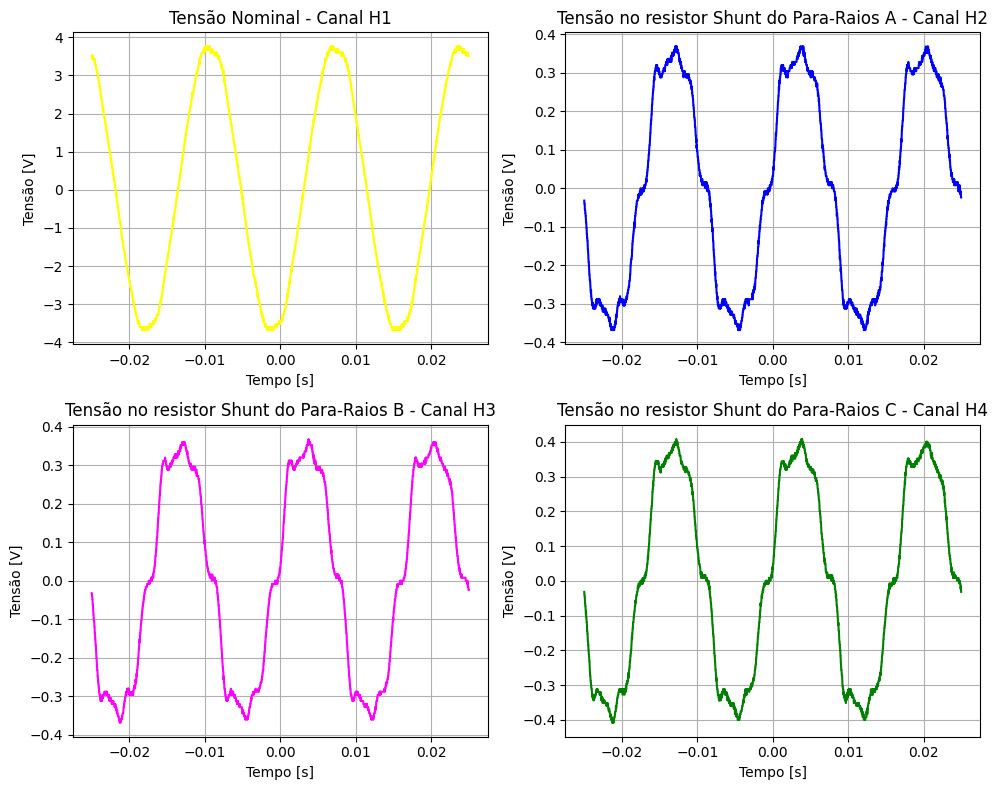

In [7]:
# Dados para CH1
tempo1 = novo_CH1['Tempo1']
amplitude1 = novo_CH1['Amplitude1']

# Dados para CH2
tempo2 = novo_CH2['Tempo2']
amplitude2 = novo_CH2['Amplitude2']

# Dados para CH3
tempo3 = novo_CH3['Tempo3']
amplitude3 = novo_CH3['Amplitude3']

# Dados para CH4
tempo4 = novo_CH4['Tempo4']
amplitude4 = novo_CH4['Amplitude4']

# Criar subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotar CH1
axs[0, 0].plot(tempo1, amplitude1, color = 'yellow')
axs[0, 0].set_xlabel('Tempo [s]')
axs[0, 0].set_ylabel('Tensão [V]')
axs[0, 0].set_title('Tensão Nominal - Canal H1')
axs[0, 0].grid()

# Plotar CH2
axs[0, 1].plot(tempo2, amplitude2,color='blue')
axs[0, 1].set_xlabel('Tempo [s]')
axs[0, 1].set_ylabel('Tensão [V]')
axs[0, 1].set_title('Tensão no resistor Shunt do Para-Raios A - Canal H2')
axs[0, 1].grid()

# Plotar CH3
axs[1, 0].plot(tempo3, amplitude3, color='magenta')
axs[1, 0].set_xlabel('Tempo [s]')
axs[1, 0].set_ylabel('Tensão [V]')
axs[1, 0].set_title('Tensão no resistor Shunt do Para-Raios B - Canal H3')
axs[1, 0].grid()

# Plotar CH4
axs[1, 1].plot(tempo4, amplitude4, color='green')
axs[1, 1].set_xlabel('Tempo [s]')
axs[1, 1].set_ylabel('Tensão [V]')
axs[1, 1].set_title('Tensão no resistor Shunt do Para-Raios C - Canal H4')
axs[1, 1].grid()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()

### Plote da tensão e e corrente de fuga

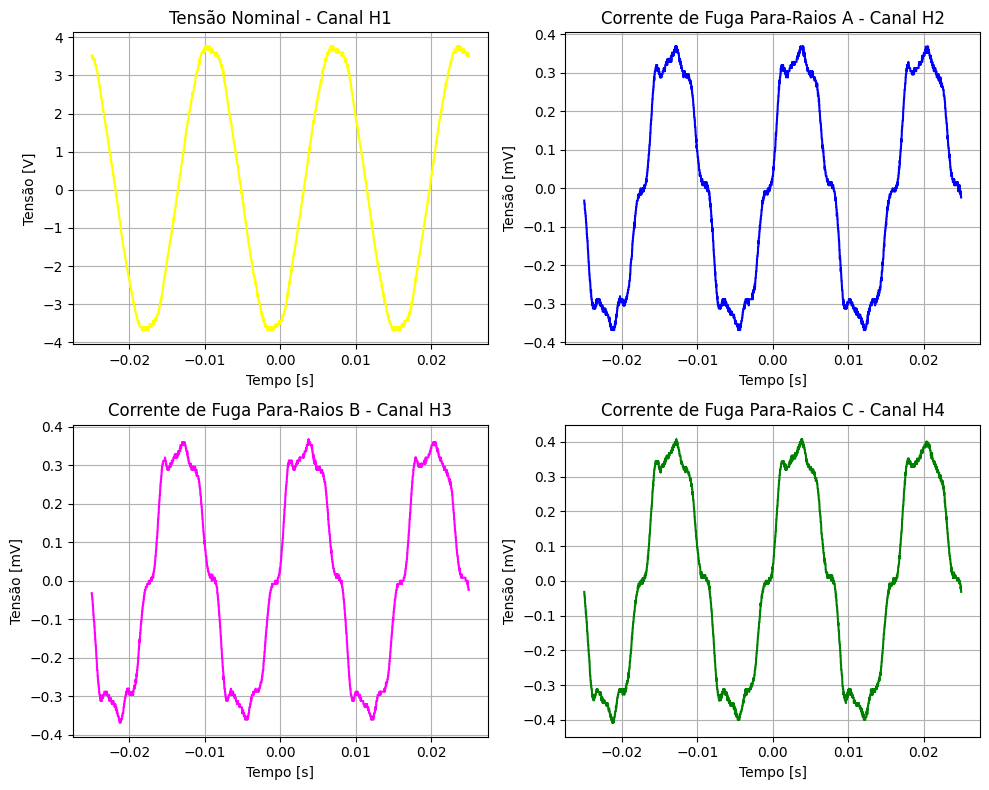

In [8]:
# Dados para CH1
tempo1 = novo_CH1['Tempo1']
amplitude1 = novo_CH1['Amplitude1']

# Dados para CH2
tempo2 = novo_CH2['Tempo2']
amplitude2 = novo_CH2['Amplitude2']

# Dados para CH3
tempo3 = novo_CH3['Tempo3']
amplitude3 = novo_CH3['Amplitude3']

# Dados para CH4
tempo4 = novo_CH4['Tempo4']
amplitude4 = novo_CH4['Amplitude4']

# Criar subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotar CH1
axs[0, 0].plot(tempo1, amplitude1, color = 'yellow')
axs[0, 0].set_xlabel('Tempo [s]')
axs[0, 0].set_ylabel('Tensão [V]')
axs[0, 0].set_title('Tensão Nominal - Canal H1')
axs[0, 0].grid()

# Plotar CH2
axs[0, 1].plot(tempo2, amplitude2,color='blue')
axs[0, 1].set_xlabel('Tempo [s]')
axs[0, 1].set_ylabel('Tensão [mV]')
axs[0, 1].set_title('Corrente de Fuga Para-Raios A - Canal H2')
axs[0, 1].grid()

# Plotar CH3
axs[1, 0].plot(tempo3, amplitude3, color='magenta')
axs[1, 0].set_xlabel('Tempo [s]')
axs[1, 0].set_ylabel('Tensão [mV]')
axs[1, 0].set_title('Corrente de Fuga Para-Raios B - Canal H3')
axs[1, 0].grid()

# Plotar CH4
axs[1, 1].plot(tempo4, amplitude4, color='green')
axs[1, 1].set_xlabel('Tempo [s]')
axs[1, 1].set_ylabel('Tensão [mV]')
axs[1, 1].set_title('Corrente de Fuga Para-Raios C - Canal H4')
axs[1, 1].grid()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()

### Valores da corrente de fuga

In [9]:
# Resistência do resistor shunt em ohms
resistencia = 1000  # 1k ohms

# Converter os dados de tensão para corrente usando a Lei de Ohm
corrente_CH2 = novo_CH2['Amplitude2'] / resistencia

corrente_CH3 = novo_CH3['Amplitude3'] / resistencia

corrente_CH4 = novo_CH4['Amplitude4'] / resistencia

### Plota o espectro de frequência de cada canal

In [10]:
fft_calculo_tensao = np.fft.fft(novo_CH1['Amplitude1']) # Cálculo da transformada de Fourier
fft_abs_tensao = 2*np.abs(fft_calculo_tensao/N) # FFT com valores absolutos
#f_v = np.fft.ifft(fft_calculo_tensao) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_tensao = np.angle(fft_calculo_tensao)

fft_calculo_corrente_H2 = np.fft.fft(corrente_CH2) # Cálculo da transformada de Fourier
fft_abs_corrente_H2 = 2*np.abs(fft_calculo_corrente_H2/N) # FFT com valores absolutos
#f_v = np.fft.ifft(fft_calculo_corrente_H2) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_corrente_H2 = np.angle(fft_calculo_corrente_H2)

fft_calculo_corrente_H3 = np.fft.fft(corrente_CH3) # Cálculo da transformada de Fourier
fft_abs_corrente_H3 = 2*np.abs(fft_calculo_corrente_H3/N) # FFT com valores absolutos
#f_v = np.fft.ifft(fft_calculo_corrente_H3) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_corrente_H3 = np.angle(fft_calculo_corrente_H3)

fft_calculo_corrente_H4 = np.fft.fft(corrente_CH4) # Cálculo da transformada de Fourier
fft_abs_corrente_H4 = 2*np.abs(fft_calculo_corrente_H4/N) # FFT com valores absolutos
#f_v = np.fft.ifft(fft_calculo_corrente_H4) # Calculando a inversa de Fourier para o sinal de frequencia
angulo_corrente_H4 = np.angle(fft_calculo_corrente_H4)

### Canal H1 - Tensão Nominal

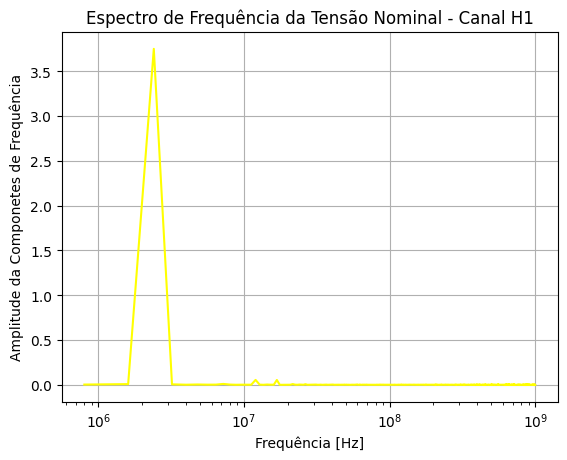

In [11]:
plt.figure()
plt.title("Espectro de Frequência da Tensão Nominal - Canal H1")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude da Componetes de Frequência")
plt.semilogx((f[f>0]), fft_abs_tensao[f>0], color='yellow')
plt.grid(True)

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_tensao = np.degrees(angulo_tensao)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_tensao = []
modulos_salvos_tensao = []
angulos_salvos_tensao = []
frequencias_multiplos_60_tensao = []
modulos_multiplos_60_tensao = []
angulos_multiplos_60_tensao = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da tensão\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_tensao, mod_tensao, ang_graus_tensao in zip(f[f>0], fft_abs_tensao[f>0], angulo_graus_tensao[f>0]):
  if (f_tensao < 0.1e9) and (mod_tensao > 0.05e-3):
    print(f"{f_tensao:.2f}\t\t\t{mod_tensao:.10f}\t\t\t{ang_graus_tensao:.2f}°")
    frequencias_salvas_tensao.append(f_tensao)
    modulos_salvos_tensao.append(mod_tensao)
    angulos_salvos_tensao.append(ang_graus_tensao)

In [14]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_tensao = np.argmax(modulos_salvos_tensao)
frequencia_fundamental_tensao = frequencias_salvas_tensao[indice_fundamental_tensao]

print("Frequência fundamental:", frequencia_fundamental_tensao)

# Listas para armazenar os múltiplos
frequencias_multiplos_tensao = []
modulos_multiplos_tensao = []
angulos_multiplos_tensao = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia in enumerate(frequencias_salvas_tensao):
    if frequencia % frequencia_fundamental_tensao == 0:
        frequencias_multiplos_tensao.append(frequencia)
        modulos_multiplos_tensao.append(modulos_salvos_tensao[i])
        angulos_multiplos_tensao.append(angulos_salvos_tensao[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_tensao)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_tensao, modulos_multiplos_tensao, angulos_multiplos_tensao):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")

Frequência fundamental: 2400960.3841536613
Múltiplos da frequência fundamental:  2400960.3841536613


Frequência (Hz)		Módulo (v)			Ângulo (graus)

2400960.38		 3.7504405907			 22.57
4801920.77		 0.0038504088			 -56.54
7202881.15		 0.0101415963			 -48.71
9603841.54		 0.0015434107			 -113.24
14405762.30		 0.0033075021			 -27.87
19207683.07		 0.0009229009			 -107.32
28811524.61		 0.0013070253			 49.12
38415366.15		 0.0010277576			 28.18
57623049.22		 0.0009932274			 -125.24
76830732.29		 0.0005958074			 -173.10


### Canal H2 - Corrente de Fuga do Para-Raio A

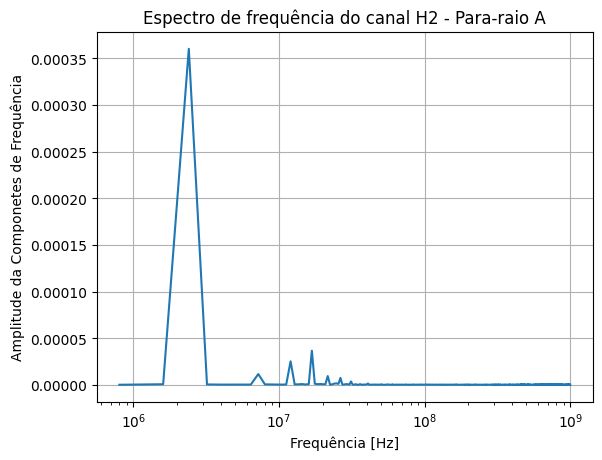

In [15]:
plt.figure()
plt.title("Espectro de frequência do canal H2 - Para-raio A")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude da Componetes de Frequência")
plt.semilogx((f[f>0]), fft_abs_corrente_H2[f>0])
plt.grid(True)

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_corrente_H2 = np.degrees(angulo_corrente_H2)

# Listas para salvar os valores de frequência, módulo e ângulo para CORRENTE.
frequencias_salvas_corrente_H2 = []
modulos_salvos_corrente_H2 = []
angulos_salvos_corrente_H2 = []
frequencias_multiplos_60_corrente_H2 = []
modulos_multiplos_60_corrente_H2 = []
angulos_multiplos_60_corrente_H2 = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro de frequência da corrente de Fuga do Para-Raio (A) - Canal H2\n")
print("Frequência (Hz)\t\tMódulo (A)\t\t\tÂngulo (graus)\n")
for f_corrente_H2, mod_corrente_H2, ang_graus_corrente_H2 in zip(f[f>0], fft_abs_corrente_H2[f>0], angulo_graus_corrente_H2[f>0]):
  if (f_corrente_H2 <= 0.2e9):
    print(f"{f_corrente_H2:.2f}\t\t\t{mod_corrente_H2:.10f}\t\t\t{ang_graus_corrente_H2:.2f}°")
    frequencias_salvas_corrente_H2.append(f_corrente_H2)
    modulos_salvos_corrente_H2.append(mod_corrente_H2)
    angulos_salvos_corrente_H2.append(ang_graus_corrente_H2)

In [17]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_corrente_H2 = np.argmax(modulos_salvos_corrente_H2)
frequencia_fundamental_corrente_H2 = frequencias_salvas_corrente_H2[indice_fundamental_corrente_H2]

print("Frequência fundamental:", frequencia_fundamental_corrente_H2)

# Listas para armazenar os múltiplos
frequencias_multiplos_corrente_H2 = []
modulos_multiplos_corrente_H2 = []
angulos_multiplos_corrente_H2 = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_corrente_H2 in enumerate(frequencias_salvas_corrente_H2):
    if frequencia_corrente_H2 % frequencia_fundamental_corrente_H2 == 0:
        frequencias_multiplos_corrente_H2.append(frequencia_corrente_H2)
        modulos_multiplos_corrente_H2.append(modulos_salvos_corrente_H2[i])
        angulos_multiplos_corrente_H2.append(angulos_salvos_corrente_H2[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_corrente_H2)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_corrente_H2, modulos_multiplos_corrente_H2, angulos_multiplos_corrente_H2):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 2400960.3841536613
Múltiplos da frequência fundamental:  2400960.3841536613


Frequência (Hz)		Módulo (v)			Ângulo (graus)

2400960.38		 0.0003603108			 105.43
4801920.77		 0.0000003051			 23.08
7202881.15		 0.0000115736			 117.02
9603841.54		 0.0000002983			 -77.69
14405762.30		 0.0000007946			 130.73
19207683.07		 0.0000008888			 -64.25
28811524.61		 0.0000007425			 -133.76
38415366.15		 0.0000001735			 176.54
57623049.22		 0.0000001597			 -175.63
76830732.29		 0.0000001638			 -129.27
115246098.44		 0.0000001621			 -145.59
153661464.59		 0.0000002083			 15.54


In [ ]:
for valor in enumerate(modulos_salvos_corrente_H2):
  print(valor)

### Canal H3 - Corrente de Fuga do Para-Raio B

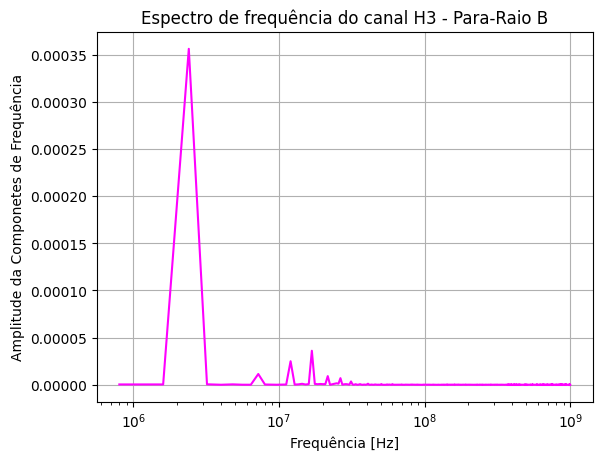

In [18]:
plt.figure()
plt.title("Espectro de frequência do canal H3 - Para-Raio B")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude da Componetes de Frequência")
plt.semilogx((f[f>0]), fft_abs_corrente_H3[f>0], color='magenta')
plt.grid(True)

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_corrente_H3 = np.degrees(angulo_corrente_H3)

# Listas para salvar os valores de frequência, módulo e ângulo para CORRENTE.
frequencias_salvas_corrente_H3 = []
modulos_salvos_corrente_H3 = []
angulos_salvos_corrente_H3 = []
frequencias_multiplos_60_corrente_H3 = []
modulos_multiplos_60_corrente_H3 = []
angulos_multiplos_60_corrente_H3 = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro de frequência da corrente de Fuga do Para-Raio (B) - Canal H3\n")
print("Frequência (Hz)\t\tMódulo (A)\t\t\tÂngulo (graus)\n")
for f_corrente_H3, mod_corrente_H3, ang_graus_corrente_H3 in zip(f[f>0], fft_abs_corrente_H3[f>0], angulo_graus_corrente_H3[f>0]):
  if (f_corrente_H3 <= 0.2e9):
    print(f"{f_corrente_H3:.2f}\t\t\t{mod_corrente_H3:.10f}\t\t\t{ang_graus_corrente_H3:.2f}°")
    frequencias_salvas_corrente_H3.append(f_corrente_H3)
    modulos_salvos_corrente_H3.append(mod_corrente_H3)
    angulos_salvos_corrente_H3.append(ang_graus_corrente_H3)

In [21]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_corrente_H3 = np.argmax(modulos_salvos_corrente_H3)
frequencia_fundamental_corrente_H3 = frequencias_salvas_corrente_H3[indice_fundamental_corrente_H3]

print("Frequência fundamental:", frequencia_fundamental_corrente_H3)

# Listas para armazenar os múltiplos
frequencias_multiplos_corrente_H3 = []
modulos_multiplos_corrente_H3 = []
angulos_multiplos_corrente_H3 = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_corrente_H3 in enumerate(frequencias_salvas_corrente_H3):
    if frequencia_corrente_H3 % frequencia_fundamental_corrente_H3 == 0:
        frequencias_multiplos_corrente_H3.append(frequencia_corrente_H3)
        modulos_multiplos_corrente_H3.append(modulos_salvos_corrente_H3[i])
        angulos_multiplos_corrente_H3.append(angulos_salvos_corrente_H3[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_corrente_H3)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_corrente_H3, modulos_multiplos_corrente_H3, angulos_multiplos_corrente_H3):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 2400960.3841536613
Múltiplos da frequência fundamental:  2400960.3841536613


Frequência (Hz)		Módulo (v)			Ângulo (graus)

2400960.38		 0.0003561733			 105.71
4801920.77		 0.0000004940			 26.42
7202881.15		 0.0000114732			 119.54
9603841.54		 0.0000001049			 -47.83
14405762.30		 0.0000010781			 136.51
19207683.07		 0.0000008907			 -59.67
28811524.61		 0.0000007375			 -137.94
38415366.15		 0.0000002805			 -132.06
57623049.22		 0.0000002920			 11.72
76830732.29		 0.0000002155			 2.22
115246098.44		 0.0000002571			 -79.68
153661464.59		 0.0000001598			 -29.54


In [ ]:
for valor in enumerate(modulos_salvos_corrente_H3):
  print(valor)

### Canal H4 - Corrente de Fuga do Para-Raio C

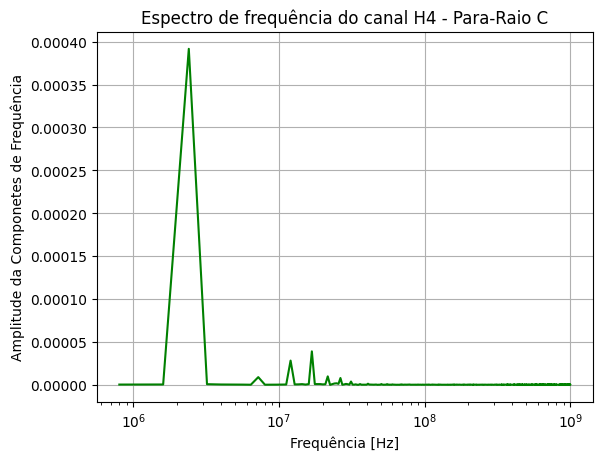

In [22]:
plt.figure()
plt.title("Espectro de frequência do canal H4 - Para-Raio C")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude da Componetes de Frequência")
plt.semilogx((f[f>0]), fft_abs_corrente_H4[f>0], color='green')
plt.grid(True)

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_corrente_H4 = np.degrees(angulo_corrente_H4)

# Listas para salvar os valores de frequência, módulo e ângulo para CORRENTE.
frequencias_salvas_corrente_H4 = []
modulos_salvos_corrente_H4 = []
angulos_salvos_corrente_H4 = []
frequencias_multiplos_60_corrente_H4 = []
modulos_multiplos_60_corrente_H4 = []
angulos_multiplos_60_corrente_H4 = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente de Fuga do Para-Raio (C) - Canal H4\n")
print("Frequência (Hz)\t\tMódulo (A)\t\t\tÂngulo (graus)\n")
for f_corrente_H4, mod_corrente_H4, ang_graus_corrente_H4 in zip(f[f>0], fft_abs_corrente_H4[f>0], angulo_graus_corrente_H4[f>0]):
  if (f_corrente_H4 <= 0.2e9):
    print(f"{f_corrente_H4:.2f}\t\t\t{mod_corrente_H4:.10f}\t\t\t{ang_graus_corrente_H4:.2f}°")
    frequencias_salvas_corrente_H4.append(f_corrente_H4)
    modulos_salvos_corrente_H4.append(mod_corrente_H4)
    angulos_salvos_corrente_H4.append(ang_graus_corrente_H4)

In [24]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_corrente_H4 = np.argmax(modulos_salvos_corrente_H4)
frequencia_fundamental_corrente_H4 = frequencias_salvas_corrente_H4[indice_fundamental_corrente_H4]

print("Frequência fundamental:", frequencia_fundamental_corrente_H4)

# Listas para armazenar os múltiplos
frequencias_multiplos_corrente_H4 = []
modulos_multiplos_corrente_H4 = []
angulos_multiplos_corrente_H4 = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_corrente_H4 in enumerate(frequencias_salvas_corrente_H4):
    if frequencia_corrente_H4 % frequencia_fundamental_corrente_H4 == 0:
        frequencias_multiplos_corrente_H4.append(frequencia_corrente_H4)
        modulos_multiplos_corrente_H4.append(modulos_salvos_corrente_H4[i])
        angulos_multiplos_corrente_H4.append(angulos_salvos_corrente_H4[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_corrente_H4)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_corrente_H4, modulos_multiplos_corrente_H4, angulos_multiplos_corrente_H4):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 2400960.3841536613
Múltiplos da frequência fundamental:  2400960.3841536613


Frequência (Hz)		Módulo (v)			Ângulo (graus)

2400960.38		 0.0003916074			 106.19
4801920.77		 0.0000003409			 89.15
7202881.15		 0.0000089623			 110.79
9603841.54		 0.0000002066			 -76.91
14405762.30		 0.0000008157			 151.96
19207683.07		 0.0000008546			 -55.44
28811524.61		 0.0000010639			 -129.82
38415366.15		 0.0000001770			 17.50
57623049.22		 0.0000000562			 -50.88
76830732.29		 0.0000001359			 13.43
115246098.44		 0.0000001830			 111.96
153661464.59		 0.0000000826			 174.97


In [ ]:
for valor in enumerate(modulos_salvos_corrente_H4):
  print(valor)

# Calculando o Fator de Potência pelo o método do IEEE

### **Calculando as Distorções Harmônicas Total do sinal de tensão**

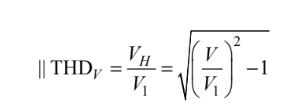

In [25]:
frequencias_multiplos_tensao_array = np.array(frequencias_multiplos_tensao)
modulos_multiplos_tensao_array = np.array(modulos_multiplos_tensao)

In [26]:
soma_v = 0
for i in modulos_multiplos_tensao_array:
    soma_v = soma_v + (i / modulos_multiplos_tensao_array[0])**2

soma_v = soma_v - 1
THD_v = np.sqrt(soma_v)

print(f"O valor da Distorção Harmônica da tensão (THDv) é: {THD_v * 100:.10f} %")

O valor da Distorção Harmônica da tensão (THDv) é: 0.3108985716 %


### **Calculando as Distorções Harmônicas Total do sinal das corrente de fuga do Para-Raio A - Canal H2**

In [27]:
frequencias_multiplos_corrente_H2_array = np.array(frequencias_multiplos_corrente_H2)
modulos_multiplos_corrente_H2_array = np.array(modulos_multiplos_corrente_H2)

In [28]:
soma_H2 = 0
for i in modulos_multiplos_corrente_H2_array:
    soma_H2 = soma_H2 + (i / modulos_multiplos_corrente_H2_array[0])**2

soma_H2 = soma_H2 - 1
THD_H2 = np.sqrt(soma_H2)

print(f"O valor da Distorção Harmônica da corrente (THDi) é: {THD_H2 * 100:.2f} %")

O valor da Distorção Harmônica da corrente (THDi) é: 3.24 %


### **Calculando as Distorções Harmônicas Total do sinal das corrente de fuga do Para-Raio B - Canal H3**

In [29]:
frequencias_multiplos_corrente_H3_array = np.array(frequencias_multiplos_corrente_H3)
modulos_multiplos_corrente_H3_array = np.array(modulos_multiplos_corrente_H3)

In [30]:
soma_H3 = 0
for i in modulos_multiplos_corrente_H3_array:
    soma_H3 = soma_H3 + (i / modulos_multiplos_corrente_H3_array[0])**2

soma_H3 = soma_H3 - 1
THD_H3 = np.sqrt(soma_H3)

print(f"O valor da Distorção Harmônica da corrente (THDi) é: {THD_H3 * 100:.2f} %")

O valor da Distorção Harmônica da corrente (THDi) é: 3.26 %


### **Calculando as Distorções Harmônicas Total do sinal das corrente de fuga do Para-Raio C - Canal H4**

In [31]:
frequencias_multiplos_corrente_H4_array = np.array(frequencias_multiplos_corrente_H4)
modulos_multiplos_corrente_H4_array = np.array(modulos_multiplos_corrente_H4)

In [32]:
soma_H4 = 0
for i in modulos_multiplos_corrente_H4_array:
    soma_H4 = soma_H4 + (i / modulos_multiplos_corrente_H4_array[0])**2

soma_H4 = soma_H4 - 1
THD_H4 = np.sqrt(soma_H4)

print(f"O valor da Distorção Harmônica da corrente (THDi) é: {THD_H4 * 100:.2f} %")

O valor da Distorção Harmônica da corrente (THDi) é: 2.33 %


# **Potência Ativa Não Fundamental**

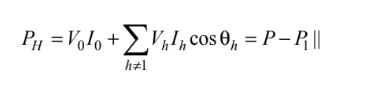

In [33]:
# Calculando potência para DC
V_o = 0
I_o = 0

P_o = V_o * I_o
P_o

0

# Para_raio A

In [34]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H2 - Para-Raio A

soma_harmonic_1 = 0

for f_h, v_h, i_h, angulo_tensao_h, angulo_corrente_h  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_corrente_H2, angulos_salvos_tensao, angulos_salvos_corrente_H2):
  if (f_h != 60): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_1 = soma_harmonic_1 + v_h * i_h * np.cos(angulo_tensao_h - angulo_corrente_h)

soma_harmonic_1

0.0005139535848450753

In [50]:
# Calculando Potência não Fundamental
P_H2 = P_o + soma_harmonic_1
P_H2

0.0005139535848450753

# Para-Raio B

In [36]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H3 - Para-Raio B

soma_harmonic_2 = 0

for f_h, v_h, i_h, angulo_tensao_h, angulo_corrente_h  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_corrente_H3, angulos_salvos_tensao, angulos_salvos_corrente_H3):
  if (f_h != 60): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_2 = soma_harmonic_2 + v_h * i_h * np.cos(angulo_tensao_h - angulo_corrente_h)

soma_harmonic_2

0.00014316933903541504

In [52]:
# Calculando Potência não Fundamental
P_H3 = P_o + soma_harmonic_2
P_H3

0.00014316933903541504

# Para-Raio C

In [38]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H4 - Para-Raio C

soma_harmonic_3 = 0

for f_h, v_h, i_h, angulo_tensao_h, angulo_corrente_h  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_corrente_H4, angulos_salvos_tensao, angulos_salvos_corrente_H4):
  if (f_h != 60): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_3 = soma_harmonic_3 + v_h * i_h * np.cos(angulo_tensao_h - angulo_corrente_h)

soma_harmonic_3

-0.0005414680752163632

In [54]:
# Calculando Potência não Fundamental
P_H4 = P_o + soma_harmonic_3
P_H4

-0.0005414680752163632

## **Fator de Potência Fundamental**

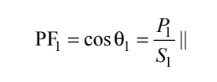

In [77]:
# Calculando o fator de potencia fundamental Para-Raio A
FP_1_H2 = np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H2[0])
print(FP_1_H2)

0.3803752448368717


In [59]:
# Calculando o fator de potencia fundamental Para-Raio B
FP_1_H3 = np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H3[0])
print(FP_1_H3)

0.10717975738719962


In [61]:
# Calculando o fator de potencia fundamental Para-Raio C
FP_1_H4 = np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H4[0])
print(FP_1_H4)

-0.3668301217201873


# **Potência Ativa Fundamental**

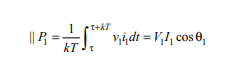

In [62]:
P_1_H2 = modulos_multiplos_tensao[0] * modulos_multiplos_corrente_H2[0] * np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H2[0])
P_1_H2

0.000514010280865513

In [63]:
P_1_H3 = modulos_multiplos_tensao[0] * modulos_multiplos_corrente_H3[0] * np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H3[0])
P_1_H3

0.00014317145438490689

In [64]:
P_1_H4 = modulos_multiplos_tensao[0] * modulos_multiplos_corrente_H4[0] * np.cos(angulos_multiplos_tensao[0] - angulos_multiplos_corrente_H4[0])
P_1_H4

-0.0005387635695810176

# **Potência Ativa**

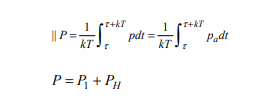

In [67]:
P_Ativa_H2 = P_1_H2 + P_H2
print(f'O potência ativa é: {P_Ativa_H2}')

O potência ativa é: 0.0010279638657105883


In [68]:
P_Ativa_H3 = P_1_H3 + P_H3
print(f'O potência ativa é: {P_Ativa_H3}')

O potência ativa é: 0.0002863407934203219


In [69]:
P_Ativa_H4 = P_1_H4 + P_H4
print(f'O potência ativa é: {P_Ativa_H4}')

O potência ativa é: -0.001080231644797381


## **Fator de Potência**

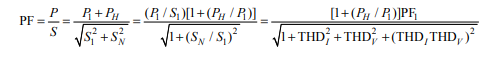

In [80]:
FP_A = ((1 + (P_H2/P_1_H2)) * FP_1_H2) / np.sqrt(1 + np.square(THD_H2) + np.square(THD_v) + np.square(THD_H2 * THD_v))
print(f'O fator de potência Pra-Raio A é: {FP_A}')

O fator de potência Pra-Raio A é: 0.76030597970857


In [83]:
FP_B = ((1 + (P_H3/P_1_H3)) * FP_1_H3) / np.sqrt(1 + np.square(THD_H3) + np.square(THD_v) + np.square(THD_H3 * THD_v))
print(f'O fator de potência Pra-Raio B é: {FP_B}')

O fator de potência Pra-Raio B é: 0.21424319080007564


In [84]:
FP_C = ((1 + (P_H4/P_1_H4)) * FP_1_H4) / np.sqrt(1 + np.square(THD_H4) + np.square(THD_v) + np.square(THD_H4 * THD_v))
print(f'O fator de potência Pra-Raio C é: {FP_C}')

O fator de potência Pra-Raio C é: -0.735298915282232
